<a target="_blank" href="https://colab.research.google.com/github/RUTIK675LT/DM_assignment_5/blob/main/Tabular%20Data/Tabular_data.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<a target="_blank" href="https://medium.com/@rutikrasik.darda/data-mining-a-tabular-dataset-with-chat-gpt-4-43d9c8b8c9de"><img src="https://github-readme-medium-recent-article.vercel.app/medium/@username/index" alt="Medium Article"></a>
Open in Medium Article

**EDA -**

In [1]:
import pandas as pd

# Load the dataset
udemy_courses = pd.read_csv('/content/udemy_courses.csv')

# Display the first few rows of the dataset
udemy_courses.head()


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [2]:
# Summary statistics for numerical columns
numerical_summary = udemy_courses.describe()

# Overview of non-numerical columns
non_numerical_summary = udemy_courses.describe(include='O')

numerical_summary, non_numerical_summary


(          course_id        price  num_subscribers   num_reviews  num_lectures  \
 count  3.678000e+03  3678.000000      3678.000000   3678.000000   3678.000000   
 mean   6.759720e+05    66.049483      3197.150625    156.259108     40.108755   
 std    3.432732e+05    61.005755      9504.117010    935.452044     50.383346   
 min    8.324000e+03     0.000000         0.000000      0.000000      0.000000   
 25%    4.076925e+05    20.000000       111.000000      4.000000     15.000000   
 50%    6.879170e+05    45.000000       911.500000     18.000000     25.000000   
 75%    9.613555e+05    95.000000      2546.000000     67.000000     45.750000   
 max    1.282064e+06   200.000000    268923.000000  27445.000000    779.000000   
 
        content_duration  
 count       3678.000000  
 mean           4.094517  
 std            6.053840  
 min            0.000000  
 25%            1.000000  
 50%            2.000000  
 75%            4.500000  
 max           78.500000  ,
                

In [3]:
# Check for missing values in the dataset
missing_values = udemy_courses.isnull().sum()

missing_values


course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

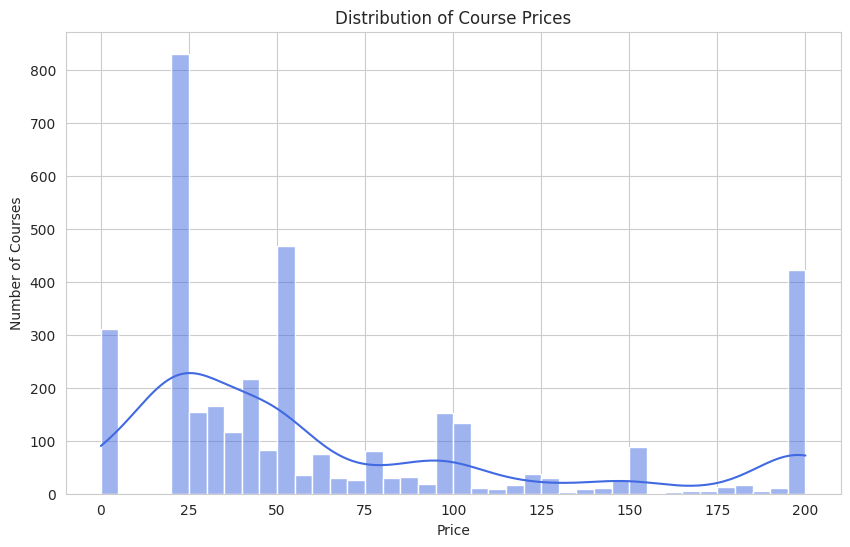

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Distribution of course prices
plt.figure(figsize=(10, 6))
sns.histplot(udemy_courses['price'], bins=40, kde=True, color='royalblue')
plt.title('Distribution of Course Prices')
plt.xlabel('Price')
plt.ylabel('Number of Courses')
plt.show()


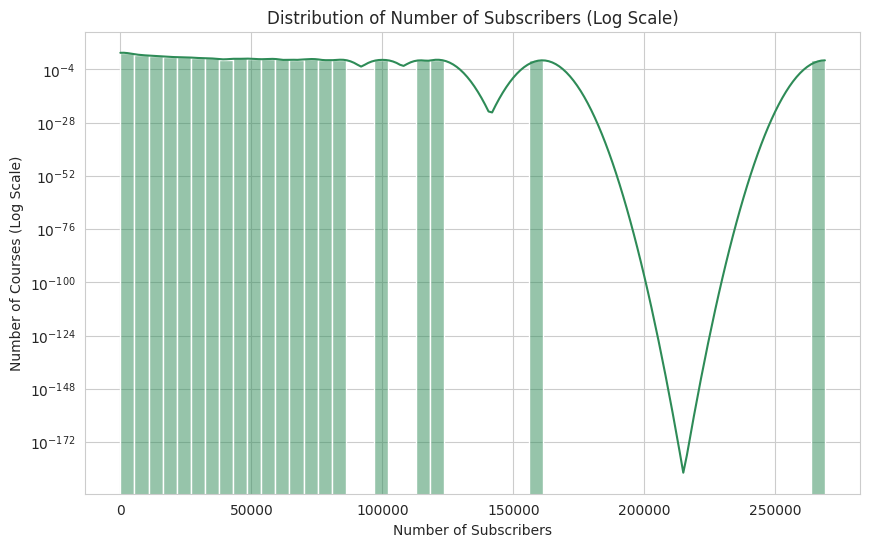

In [5]:
# Distribution of the number of subscribers (using a log scale for y-axis)
plt.figure(figsize=(10, 6))
sns.histplot(udemy_courses['num_subscribers'], bins=50, kde=True, color='seagreen')
plt.yscale('log')
plt.title('Distribution of Number of Subscribers (Log Scale)')
plt.xlabel('Number of Subscribers')
plt.ylabel('Number of Courses (Log Scale)')
plt.show()


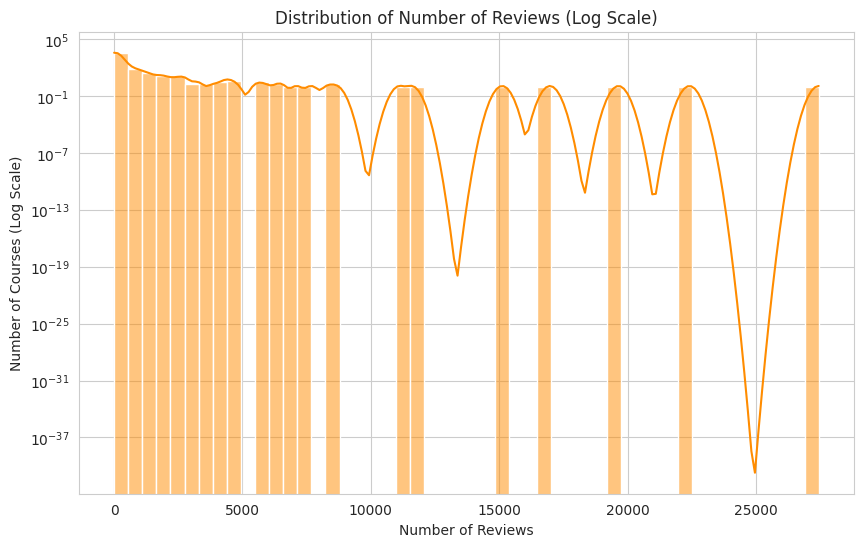

In [6]:
# Distribution of the number of reviews (using a log scale for y-axis)
plt.figure(figsize=(10, 6))
sns.histplot(udemy_courses['num_reviews'], bins=50, kde=True, color='darkorange')
plt.yscale('log')
plt.title('Distribution of Number of Reviews (Log Scale)')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Courses (Log Scale)')
plt.show()


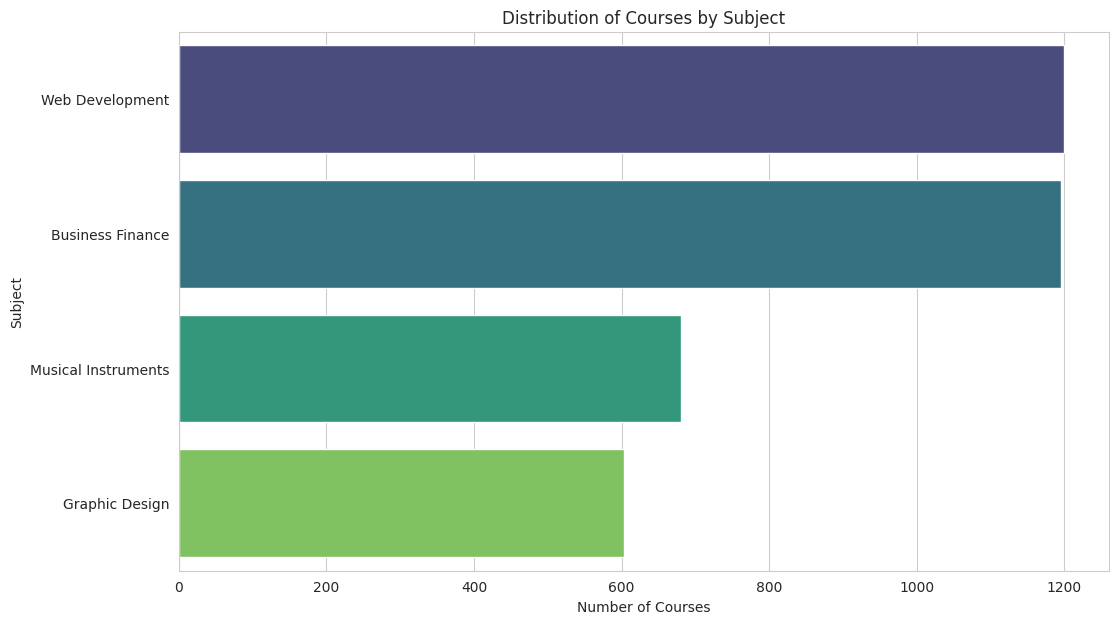

In [7]:
# Distribution of courses by subject
plt.figure(figsize=(12, 7))
sns.countplot(y=udemy_courses['subject'], order=udemy_courses['subject'].value_counts().index, palette='viridis')
plt.title('Distribution of Courses by Subject')
plt.xlabel('Number of Courses')
plt.ylabel('Subject')
plt.show()


**CLUSTERING -**

In [8]:
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for clustering
features = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
clustering_data = udemy_courses[features]

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

scaled_data


array([[ 2.19600149, -0.11050931, -0.14247361,  0.21619696, -0.428632  ],
       [ 0.14673589, -0.04263476,  0.81975891,  4.64286453,  5.76662528],
       [-0.34508786, -0.10766805, -0.0879471 ,  0.21619696, -0.26342514],
       ...,
       [-0.42705848, -0.28245818,  0.01362189,  0.15664538, -0.09821828],
       [-0.26311723, -0.30487257, -0.13392043, -0.04185989, -0.18082171],
       [-0.34508786, -0.24162822, -0.12857469, -0.39916938, -0.34602857]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

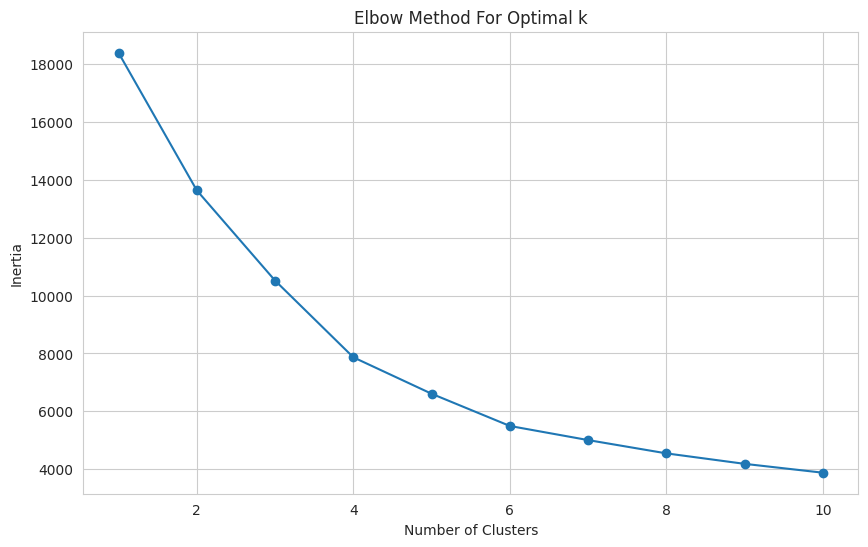

In [9]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
inertia = []
possible_k_values = range(1, 11)  # Checking for up to 10 clusters

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, inertia, '-o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


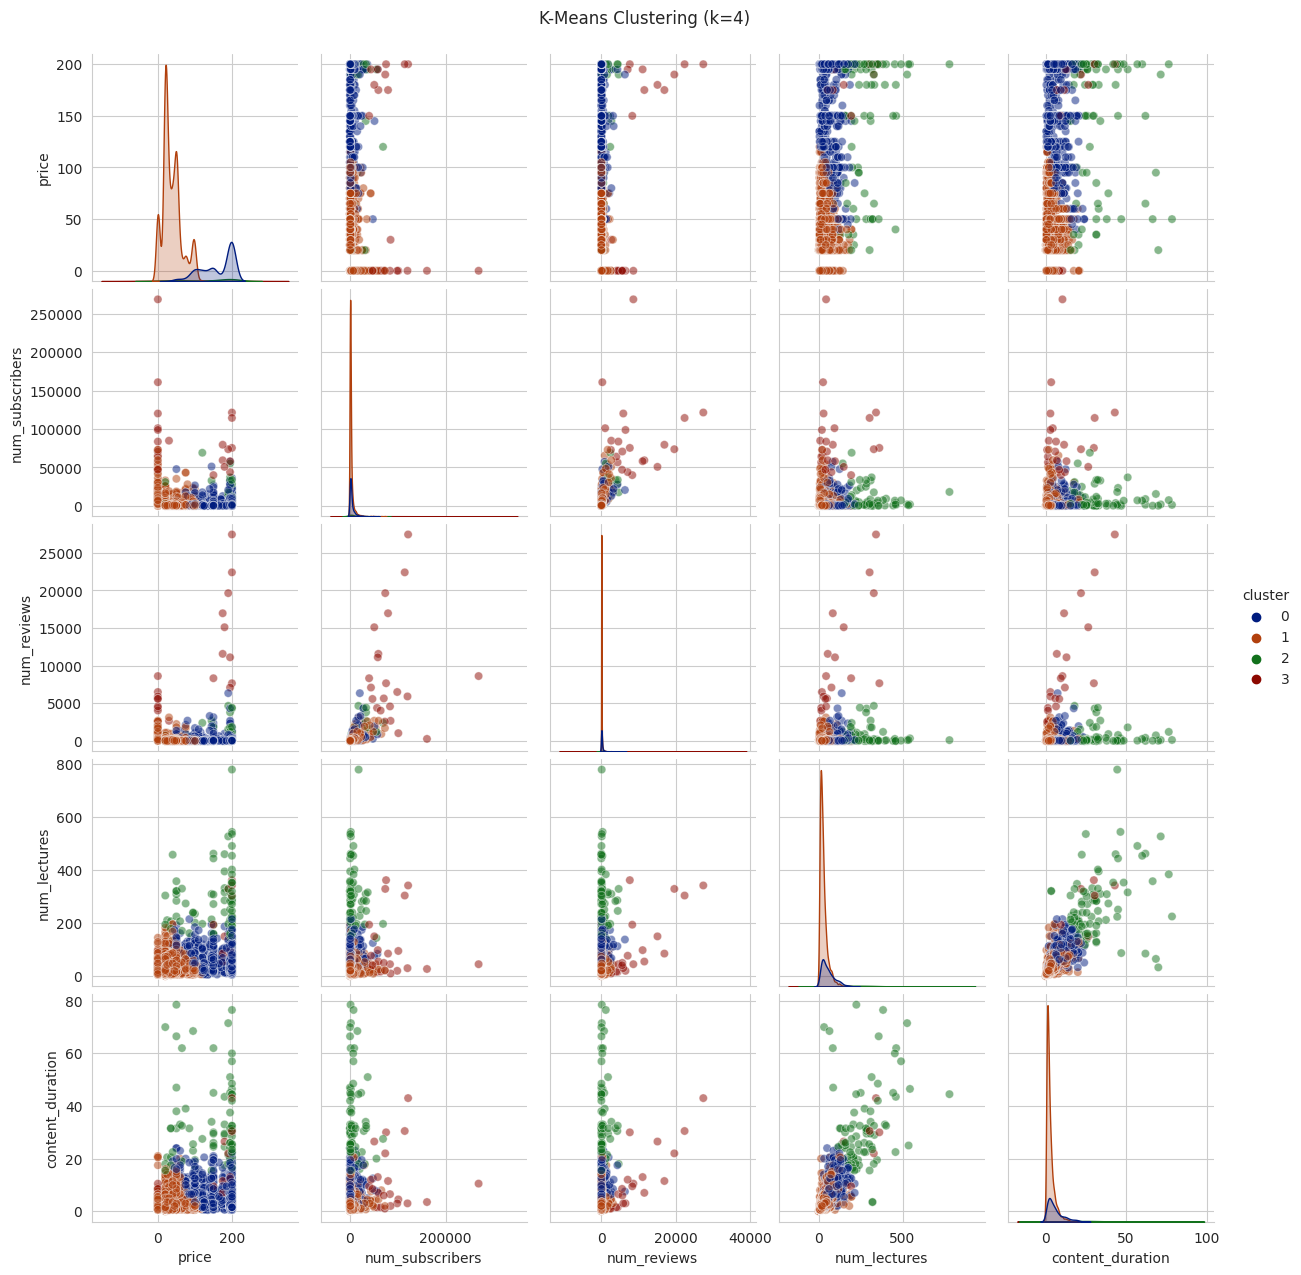

In [10]:
# Applying KMeans clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
udemy_courses['cluster'] = kmeans.fit_predict(scaled_data)

# Visualizing clusters using a pairplot
sns.pairplot(udemy_courses, hue='cluster', vars=features, palette='dark', plot_kws={'alpha': 0.5})
plt.suptitle('K-Means Clustering (k=4)', y=1.02)
plt.show()


**ML MODEL -**

In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/udemy_courses.csv')

# Display the first few rows of the dataset
df.head()


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [15]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 60.1 MB/s e

In [17]:
pip install --upgrade scipy pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 13.2 MB/s eta 0:00:00


In [18]:
from pycaret.classification import *
setup_env = setup(data=df, target='is_paid',
                  ignore_features=['course_id', 'course_title', 'url', 'published_timestamp'],
                  session_id=123)


,Description,Value
0,Session id,123
1,Target,is_paid
2,Target type,Binary
3,Original data shape,"(3678, 12)"
4,Transformed data shape,"(3678, 14)"
5,Transformed train set shape,"(2574, 14)"
6,Transformed test set shape,"(1104, 14)"
7,Ignore features,4
8,Numeric features,5
9,Categorical features,2


In [19]:
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.7310
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2110
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6440
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1490
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3850
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1250
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1780
et,Extra Trees Classifier,0.9992,1.0000,0.9996,0.9996,0.9996,0.9949,0.9950,0.3640
nb,Naive Bayes,0.9969,1.0000,1.0000,0.9966,0.9983,0.9793,0.9796,0.1880
lda,Linear Discriminant Analysis,0.9219,0.9504,0.9936,0.9265,0.9589,0.2096,0.2830,0.1810


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
rf_model = create_model('rf')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
tuned_rf = tune_model(rf_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
final_rf = finalize_model(tuned_rf)
save_model(final_rf, 'final_rf_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['price', 'num_subscribers',
                                              'num_reviews', 'num_lectures',
                                              'content_duration'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categoric...
                  RandomForestClassifier(